## Perceptron
- Many inputs
- One output
<img src="./Figs/1.jpg" alt="Drawing" style="width: 300px;"/>

### Linear Regression
<img src="./Figs/2.jpg" alt="Drawing" style="width: 550px;"/>

### Multivariate
<img src="./Figs/3.jpg" alt="Drawing" style="width: 550px;"/>

### Logistic Regression
- Binary output (0 or 1)
- Activation function = sigmoid
<img src="./Figs/4.jpg" alt="Drawing" style="width: 550px;"/>

### Perceptron
- Binary output (0 or 1)
- Activation function = step function
<img src="./Figs/5.jpg" alt="Drawing" style="width: 550px;"/>
- Symbol
<img src="./Figs/6.jpg" alt="Drawing" style="width: 550px;"/>


## Fully connected neural network - Multi-layer perceptron
- Multi-layer perceptron
- Output of previous layer = input of next layer
<img src="./Figs/7.jpg" alt="Drawing" style="width: 550px;"/>

- Layer 1
<img src="./Figs/8.jpg" alt="Drawing" style="width: 550px;"/>

- Layer 2
<img src="./Figs/9.jpg" alt="Drawing" style="width: 550px;"/>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import display

## Shallow and Deep Networks

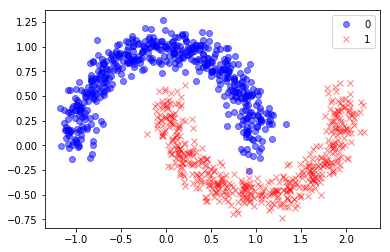

In [2]:
# Dataset - Classification problem
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.1, random_state=0)
plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5) # Label 1: blue
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5) # Label 2: Red
plt.legend(['0', '1'])

In [3]:
# 1000 datapoints - 2 features(coordinates of the datapoint)
X.shape

(1000, 2)

### Train/Test split

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42)

### Decision Boundary Plot

In [5]:
def plot_decision_boundary(model, X, y):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    c = model.predict(ab)
    cc = c.reshape(aa.shape)

    plt.figure(figsize=(12, 8))
    plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)
    plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
    plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
    plt.legend(['0', '1'])

### Shallow Model

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# 1 layer
model = Sequential()
model.add(
    Dense(1, input_shape=(2,), activation='sigmoid'))
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

Using TensorFlow backend.


In [7]:
# Train
model.fit(
    X_train, y_train,
    epochs=200,
    verbose=False)

In [8]:
# Evaluate test set
results = model.evaluate(X_test, y_test)

display(results)
print("The Accuracy score on the Train set is:\t{:0.3f}".format(results[1]))

300/300 [==============================] - 0s 373us/step


[0.3174502762158712, 0.8466666674613953]

The Accuracy score on the Train set is:	0.847


In [9]:
# Train/Test set Accuracy
from sklearn.metrics import accuracy_score

y_train_pred = model.predict_classes(X_train)
y_test_pred = model.predict_classes(X_test)

print("The Accuracy score on the Train set is:\t{:0.3f}".format(accuracy_score(y_train, y_train_pred)))
print("The Accuracy score on the Test set is:\t{:0.3f}".format(accuracy_score(y_test, y_test_pred)))

The Accuracy score on the Train set is:	0.889
The Accuracy score on the Test set is:	0.847


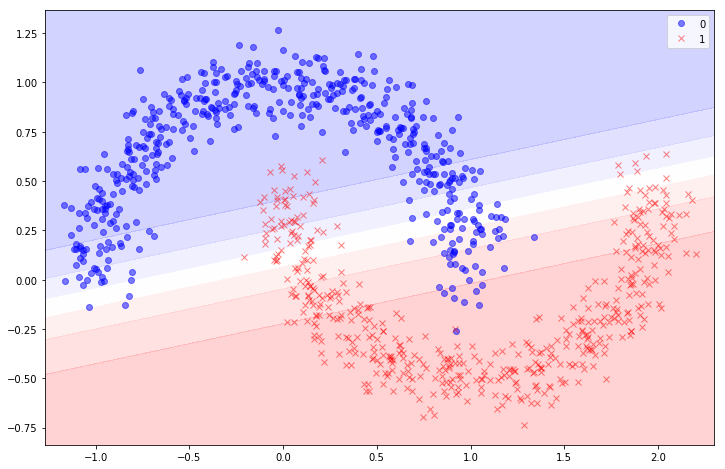

In [10]:
# Plot decision boundary
plot_decision_boundary(model, X, y)

### Deep model

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# 3 Layer
model = Sequential()

model.add(Dense(4, input_shape=(2,), activation='tanh'))
model.add(Dense(2, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

In [12]:
# Train
model.fit(
    X_train, y_train,
    epochs=100,
    verbose=0)

In [13]:
# Evaluate test set
results = model.evaluate(X_test, y_test)

display(results)
print("The Accuracy score on the Train set is:\t{:0.3f}".format(results[1]))

300/300 [==============================] - 0s 1ms/step


[0.003916789755069961, 1.0]

The Accuracy score on the Train set is:	1.000


In [14]:
# Train/Test set Accuracy
from sklearn.metrics import accuracy_score

y_train_pred = model.predict_classes(X_train)
y_test_pred = model.predict_classes(X_test)

print("The Accuracy score on the Train set is:\t{:0.3f}".format(accuracy_score(y_train, y_train_pred)))
print("The Accuracy score on the Test set is:\t{:0.3f}".format(accuracy_score(y_test, y_test_pred)))

The Accuracy score on the Train set is:	0.999
The Accuracy score on the Test set is:	1.000


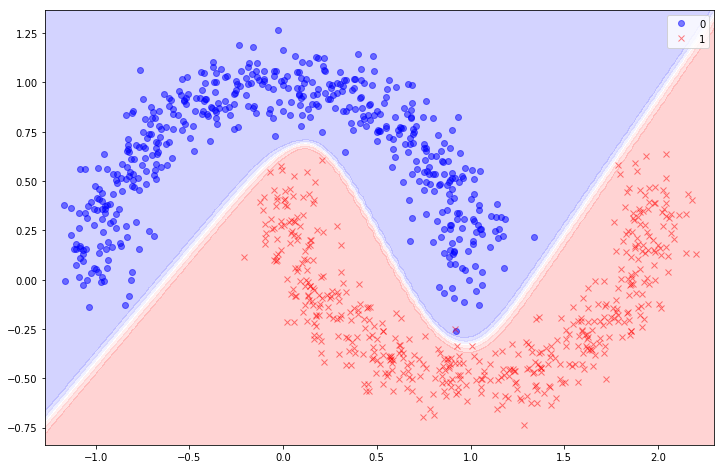

In [15]:
# Plot decision boundary
plot_decision_boundary(model, X, y)